# Homework 2: Regression 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d
from scipy import stats
from sklearn import linear_model
from sklearn.linear_model import LinearRegression

from sklearn.metrics import mean_squared_error, r2_score

%matplotlib inline

In [2]:
Elements = pd.read_csv('https://gist.githubusercontent.com/GoodmanSciences/c2dd862cd38f21b0ad36b8f96b4bf1ee/raw/1d92663004489a5b6926e944c1b3d9ec5c40900e/Periodic%2520Table%2520of%2520Elements.csv')

In [3]:
Elements

,AtomicNumber,Element,Symbol,AtomicMass,NumberofNeutrons,NumberofProtons,NumberofElectrons,Period,Group,Phase,...,FirstIonization,Density,MeltingPoint,BoilingPoint,NumberOfIsotopes,Discoverer,Year,SpecificHeat,NumberofShells,NumberofValence
0,1,Hydrogen,H,1.007,0,1,1,1,1.0,gas,...,13.5984,0.000090,14.175,20.28,3.0,Cavendish,1766.0,14.304,1,1.0
1,2,Helium,He,4.002,2,2,2,1,18.0,gas,...,24.5874,0.000179,NaN,4.22,5.0,Janssen,1868.0,5.193,1,NaN
2,3,Lithium,Li,6.941,4,3,3,2,1.0,solid,...,5.3917,0.534000,453.850,1615.00,5.0,Arfvedson,1817.0,3.582,2,1.0
3,4,Beryllium,Be,9.012,5,4,4,2,2.0,solid,...,9.3227,1.850000,1560.150,2742.00,6.0,Vaulquelin,1798.0,1.825,2,2.0
4,5,Boron,B,10.811,6,5,5,2,13.0,solid,...,8.2980,2.340000,2573.150,4200.00,6.0,Gay-Lussac,1808.0,1.026,2,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
113,114,Flerovium,Fl,289.000,175,114,114,7,14.0,artificial,...,NaN,NaN,NaN,NaN,NaN,NaN,1999.0,NaN,7,4.0
114,115,Moscovium,Mc,288.000,173,115,115,7,15.0,artificial,...,NaN,NaN,NaN,NaN,NaN,NaN,2010.0,NaN,7,5.0
115,116,Livermorium,Lv,292.000,176,116,116,7,16.0,artificial,...,NaN,NaN,NaN,NaN,NaN,NaN,2000.0,NaN,7,6.0
116,117,Tennessine,Ts,295.000,178,117,117,7,17.0,artificial,...,NaN,NaN,NaN,NaN,NaN,NaN,2010.0,NaN,7,7.0


In [4]:
Elements.keys()

Index(['AtomicNumber', 'Element', 'Symbol', 'AtomicMass', 'NumberofNeutrons',
       'NumberofProtons', 'NumberofElectrons', 'Period', 'Group', 'Phase',
       'Radioactive', 'Natural', 'Metal', 'Nonmetal', 'Metalloid', 'Type',
       'AtomicRadius', 'Electronegativity', 'FirstIonization', 'Density',
       'MeltingPoint', 'BoilingPoint', 'NumberOfIsotopes', 'Discoverer',
       'Year', 'SpecificHeat', 'NumberofShells', 'NumberofValence'],
      dtype='object')

In [5]:
qm7b = pd.read_csv('http://faculty.washington.edu/tingcao/wordpress/wp-content/uploads/2020/10/qm7b.csv');
qm7b.head()

,id,ae_pbe0,emax_zindo,imax_zindo,homo_zindo,lumo_zindo,e1_zindo,ip_zindo,ea_zindo,homo_pbe0,...,homo_gw,lumo_gw,p_pbe0,p_scs,n_H,n_C,n_N,n_O,n_S,n_Cl
0,1,-420.933746,39.694626,0.621841,-16.013,4.162,36.768073,15.72523,-3.98613,-10.9488,...,-14.1341,1.0870,2.534576,2.43222,4,1,0,0,0,0
1,2,-718.419189,22.622486,0.628328,-13.549,3.684,11.717433,13.41121,-3.49181,-9.5577,...,-12.5472,1.1186,4.332028,4.44500,6,2,0,0,0,0
2,3,-570.024841,22.940671,0.709060,-10.160,1.231,7.137266,9.75211,-0.82042,-7.8768,...,-10.4383,1.9456,4.173282,3.92308,4,2,0,0,0,0
3,4,-410.286163,15.973798,2.228480,-10.706,2.145,4.624107,10.46577,-1.89847,-8.4021,...,-11.1629,1.1958,3.512394,3.32175,2,2,0,0,0,0
4,5,-868.855408,17.900516,0.556174,-12.365,3.825,10.311655,11.96491,-3.57487,-8.3534,...,-10.8132,1.2002,5.480160,5.78632,6,3,0,0,0,0


In [6]:
qm7b.keys()

Index(['id', 'ae_pbe0', 'emax_zindo', 'imax_zindo', 'homo_zindo', 'lumo_zindo',
       'e1_zindo', 'ip_zindo', 'ea_zindo', 'homo_pbe0', 'lumo_pbe0', 'homo_gw',
       'lumo_gw', 'p_pbe0', 'p_scs', 'n_H', 'n_C', 'n_N', 'n_O', 'n_S',
       'n_Cl'],
      dtype='object')

| Column Name | Unit  |  Description |
|----------|----------|-----------|
|ae_pbe0   |kcal/mol  |Atomization energy (DFT/PBE0)
|p_pbe0    |Angstrom^3|Polarizability (DFT/PBE0)
|p_scs     |Angstrom^3|Polarizability (self-consistent screening)
|homo_gw   |eV        |Highest occupied molecular orbital (GW)
|homo_pbe0 |eV        |Highest occupied molecular orbital (DFT/PBE0)
|homo_zindo|eV        |Highest occupied molecular orbital (ZINDO/s)
|lumo_gw   |eV        |Lowest unoccupied molecular orbital (GW)
|lumo_pbe0 |eV        |Lowest unoccupied molecular orbital (DFT/PBE0)
|lumo_zindo|eV        |Lowest unoccupied molecular orbital (ZINDO/s)
|ip_zindo  |eV        |Ionization potential (ZINDO/s)
|ea_zindo  |eV        |Electron affinity (ZINDO/s)
|e1_zindo  |eV        |First excitation energy (ZINDO)
|emax_zindo|eV        |Maximal absorption intensity (ZINDO)
|imax_zindo|arbitrary |Excitation energy at maximal absorption (ZINDO)
|n_H       |          |number of Hydrogen atoms
|n_C       |          |number of Carbon atoms
|n_N       |          |number of Nitrogen atoms
|n_O       |          |number of Oxygen atoms
|n_S       |          |number of Sulfur atoms
|n_Cl      |          |number of Chlorine atoms

In [7]:
qm7b.shape

(7211, 21)

## Warm-Up (5 points)

Plot a scatter graph of `AtomicNumber` vs. `SpecificHeat`, with Atomic Number on the X axis. Label your axes and title accordingly.

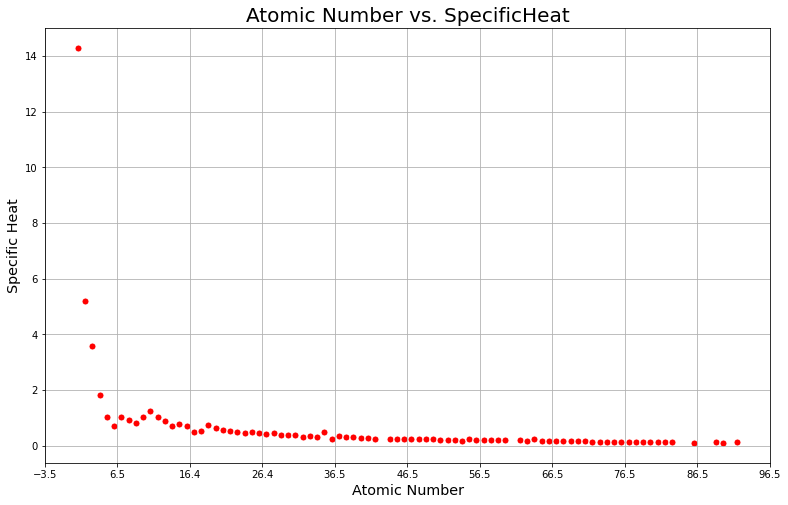

In [8]:
fig, ax = plt.subplots(figsize = (13, 8))
# I fill the Nan in SpecificHeat with 0.
ax.scatter(Elements['AtomicNumber'], Elements['SpecificHeat'], s=50, c='red', edgecolor='white')
ax.set_title('Atomic Number vs. SpecificHeat', fontsize = 20)
ax.set_xlabel('Atomic Number', fontsize='x-large', fontfamily='sans-serif')
ax.set_ylabel('Specific Heat', fontsize='x-large', fontfamily='sans-serif')
start, end = ax.get_xlim()
ax.xaxis.set_ticks(np.arange(start, end, 10))
ax.grid (axis='both')

## 1. Polynomial Regression (30 points)

*The process flow for performing non-linear regression is essentially the same as that for linear regression. The main distinction lies in the specification of the class of model (Step #1) and model hyperparameters (Step #2). We will be working through some non-linear regressions in this homework. In question 1, we have set up steps 1 and 2 for you.*

- Define a features matrix and target array in preparation for performing a fitting to the Atomic Number vs. Specific Heat plot you plotted above. 
- Experiment with different *degrees* of polynomial fitting (anything <10)
- Experiment with performing different degrees of fitting with `fit(1/X,y)` instead of `fit(X,y)`  



**What is the simplest fitting that gives you an $R^2$ value larger than 0.99? Overlay this plot on the original scatterpoints, and plot a few earlier attemps on the same or different axes, with appropriate labels and a legend.**

In [9]:
from sklearn.preprocessing import PolynomialFeatures

In [10]:
from sklearn.pipeline import make_pipeline
#The number in PolynomialFeatures() specifies the degree of your polynomial fitting
poly_model_5 = make_pipeline(PolynomialFeatures(5),
                           LinearRegression())

Elements_new = Elements.dropna(subset = ['SpecificHeat'])

In [11]:
# MATRIX
X = Elements_new[['AtomicNumber']]
X

,AtomicNumber
0,1
1,2
2,3
3,4
4,5
...,...
82,83
85,86
88,89
89,90


In [12]:
# Target Array
y = Elements_new['SpecificHeat']
y

0     14.304
1      5.193
2      3.582
3      1.825
4      1.026
       ...  
82     0.122
85     0.094
88     0.120
89     0.113
91     0.116
Name: SpecificHeat, Length: 85, dtype: float64

In [13]:
x_poly = np.linspace(0, 100, 85)
X_poly = x_poly[:, np.newaxis]

In [14]:
poly_model_5.fit(X_poly,y)

Pipeline(steps=[('polynomialfeatures', PolynomialFeatures(degree=5)),
                ('linearregression', LinearRegression())])

In [15]:
y_poly = poly_model_5.predict(X_poly)

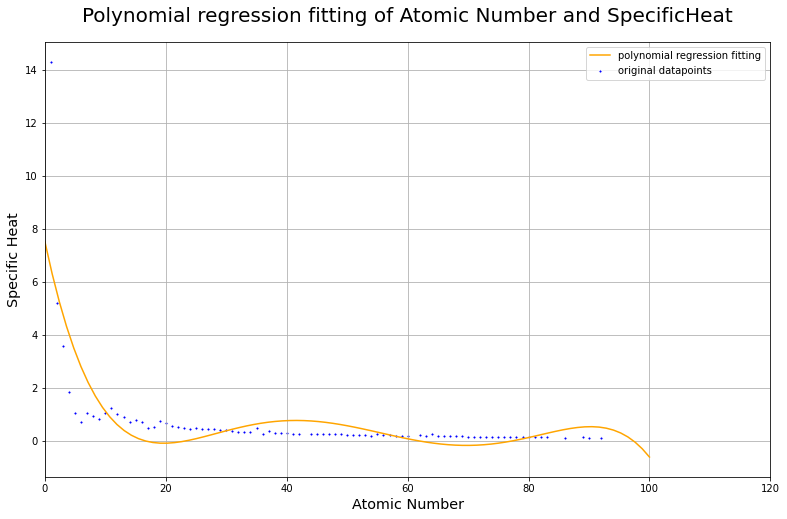

In [16]:
fig, ax = plt.subplots(figsize=(13, 8))
# plot the original graph
ax.scatter(X.values, y.values, s=10, c='b', edgecolor='white', label='original datapoints')
ax.plot(X_poly, y_poly, c='orange', label='polynomial regression fitting')
ax.legend()
ax.set_title('Polynomial regression fitting of Atomic Number and SpecificHeat', fontsize = 20, pad=20)
ax.set_xlabel('Atomic Number', fontsize='x-large', fontfamily='sans-serif')
ax.set_ylabel('Specific Heat', fontsize='x-large', fontfamily='sans-serif')
ax.set_xlim(0, 120)
ax.grid (axis='both')

## 2. Multilinear Regression (30 points)

Create a target array `gap` for bandgap - the difference between `lumo_zindo` and `homo_zindo`. 

In [17]:
gap = qm7b['lumo_zindo'] - qm7b['homo_zindo']
gap = gap.values.reshape(-1, 1)
gap

array([[20.175],
       [17.233],
       [11.391],
       ...,
       [ 8.671],
       [ 8.466],
       [ 8.675]])

Perform a multilinear regression of `ip_zindo` and `ea_zindo` to `gap` (`gap` being the target array). Create a parity plot and 3d plot of your modeled vs. original datapoints, then find the $R^2$ value and Mean Squared Error of your fitting. Is this a good fitting?

beta_0, beta_i:  [1.82088859] [[ 0.91751478 -0.94141107]]
R^2: 0.9788644032025069
MSE: 0.07068734283115137


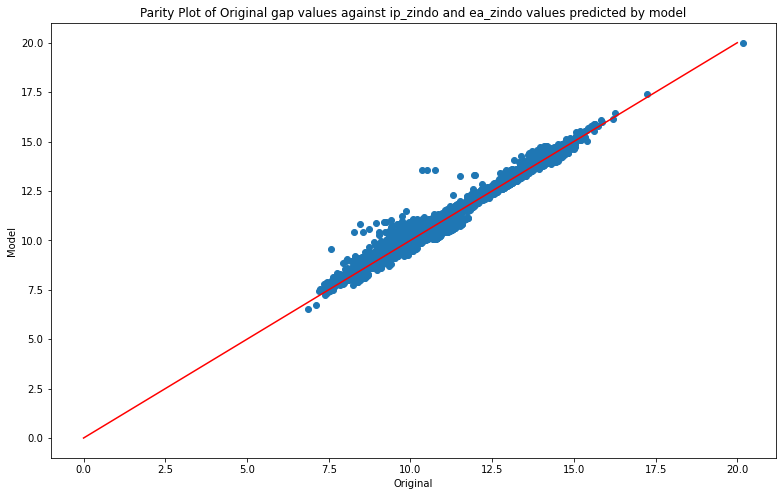

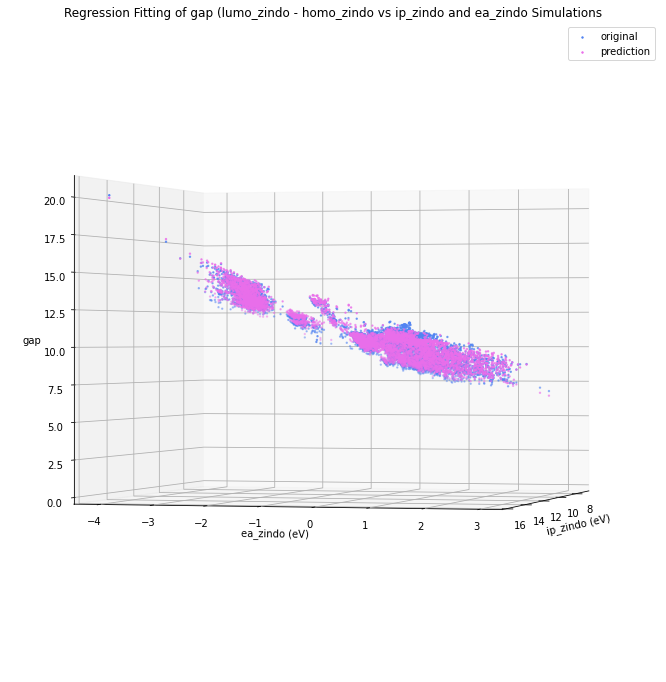

In [18]:
model2 = linear_model.LinearRegression()
X1 = qm7b[['ip_zindo', 'ea_zindo']]
y1 = gap
model2.fit(X1, y1)

# parity plot
plt.figure(figsize=(13, 8))
plt.scatter(y1, model2.predict(X1))
plt.title('Parity Plot of Original gap values against ip_zindo and ea_zindo values predicted by model')
plt.xlabel('Original')
plt.ylabel('Model')
plt.plot(np.linspace(0, 20, 10), np.linspace(0, 20, 10), c='r')
print('beta_0, beta_i: ', model2.intercept_, model2.coef_)




# 3d plot
plt.figure(figsize=(15,12))
ax = plt.axes(projection = '3d')
plot1=ax.scatter3D(qm7b['ip_zindo'], qm7b['ea_zindo'], gap, s=2, 
                   c='#5284F2', label='original')
plot2=ax.scatter3D(qm7b['ip_zindo'], qm7b['ea_zindo'],
                   model2.predict(X1), c='#EA6EEA', s=2, 
                   label='prediction')
#as always, play around with these angles to explore the fitted plane/surface
ax.view_init(0,15)
ax.set_xlabel('ip_zindo (eV)')
ax.set_ylabel('ea_zindo (eV)')
ax.set_zlabel('gap')
ax.set_zlim(0,21)
ax.legend()
ax.set_title('Regression Fitting of gap (lumo_zindo - homo_zindo vs ip_zindo and ea_zindo Simulations')

# R^2
r2 = r2_score(y1, model2.predict(qm7b[['ip_zindo','ea_zindo']]))
print('R^2: '+ str(r2))

#MSE
MSE = mean_squared_error(y1, model2.predict(qm7b[['ip_zindo','ea_zindo']]))
print('MSE: ' + str(MSE))

## 3. 3D Polynomial Fitting (35 points)

Recall from Hands-on 5 that a flat plane was fitted to a plot of `e1_zindo` against `homo_zindo` and `lumo_zindo`. With a polynomial fitting we would able to plot curved surfaces rather than just flat planes. 

a) Using the polynomial fitting technique introduced in question 1, perform a polynomial fitting to this same data (to a degree of your choice) and plot your fitting on the same 3D axes as the original data.  
b) Is your new fitting an improvement over the multiple linear regression fitting performed in the hands-on 5 notebook? Use regression metrics of your choice to demonstrate this.  
c) Now try some different degree polynomials to what you had originally used. Consider writing a loop structure to test (with appropriate regression metrics) for the optimal degree number (say no higher than 30) for modeling this data.  
d) Plot this optimized fitting on the same axes as the original data, with appropriate labeling. 

Recall that this is the data we will be performing a fitting to:

0.8709920741540836
0.4487725040365198


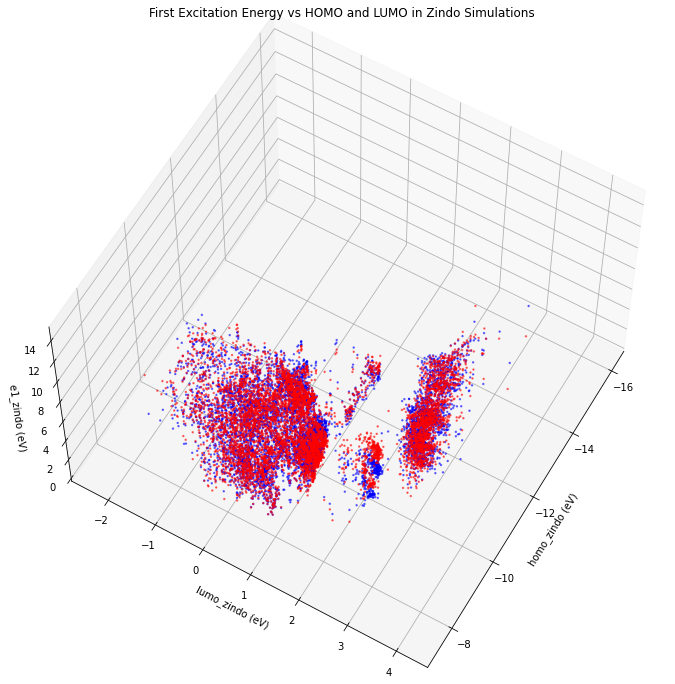

In [19]:
# plot the original datapoints
plt.figure(figsize=(15,12))
ax = plt.axes(projection = '3d',zlim = [0,15])
plot1=ax.scatter3D(qm7b['homo_zindo'], qm7b['lumo_zindo'], qm7b['e1_zindo'], s=2, alpha=0.5, c='b', label='original')
ax.view_init(60,30)
ax.set_xlabel('homo_zindo (eV)')
ax.set_ylabel('lumo_zindo (eV)')
ax.set_zlabel('e1_zindo (eV)')
ax.set_title('First Excitation Energy vs HOMO and LUMO in Zindo Simulations')

# plot the polynomial fitting
poly_model = make_pipeline(PolynomialFeatures(5), LinearRegression())
poly_model.fit(qm7b[['homo_zindo', 'lumo_zindo']], qm7b['e1_zindo'])
r2 = r2_score(qm7b['e1_zindo'], poly_model.predict(qm7b[['homo_zindo', 'lumo_zindo']]))
MSE = mean_squared_error(qm7b['e1_zindo'], poly_model.predict(qm7b[['homo_zindo', 'lumo_zindo']]))
print(r2)
print(MSE)
plot2 = ax.scatter3D(qm7b['homo_zindo'], qm7b['lumo_zindo'], 
                     poly_model.predict(qm7b[['homo_zindo', 'lumo_zindo']]), s=2, alpha=0.5, c='r', label='prediction')
# If we fit a plot based on R^2 with polynomial degree being 5, I saw that the fitting is better than the one in hand-on 5. (0.871 > 0.757)
# If we fit a plot based on MSE with polynomial degree being 5, I saw that the fitting is not good as expected.(0.45 < 0.85)

In [20]:
opti_r2 = 0
opti_mse = 0
j = 0
for i in range(2, 30, 1):
    poly_model = make_pipeline(PolynomialFeatures(i), LinearRegression())
    poly_model.fit(qm7b[['homo_zindo', 'lumo_zindo']], qm7b['e1_zindo'])
    r2 = r2_score(qm7b['e1_zindo'], poly_model.predict(qm7b[['homo_zindo', 'lumo_zindo']]))
    mse = mean_squared_error(qm7b['e1_zindo'], poly_model.predict(qm7b[['homo_zindo', 'lumo_zindo']]))
    
    if r2 > opti_r2:
        opti_r2 = r2
        j=i

print('optimal R^2 value: ' + str(opti_r2))
print('optimal degree number based on R^2 value: ' + str(j))


optimal R^2 value: 0.9365912778474118
optimal degree number based on R^2 value: 15


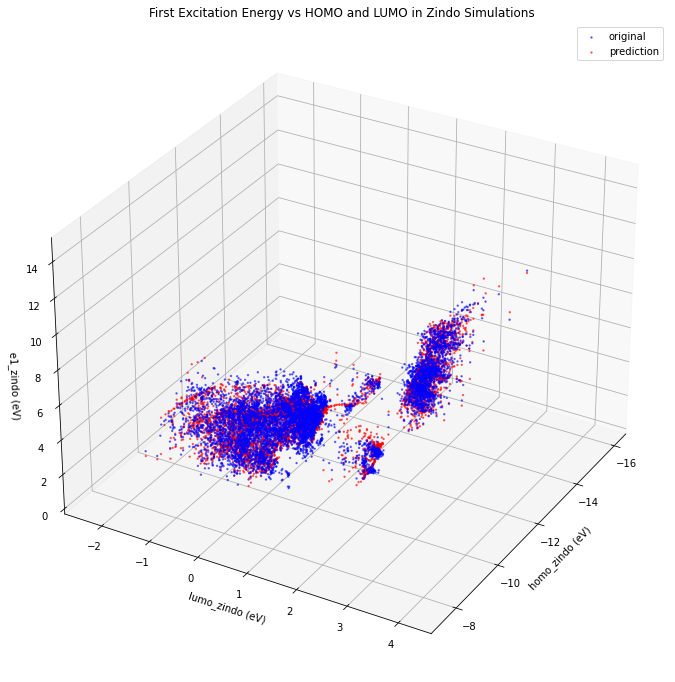

In [21]:
# plot the original datapoints
plt.figure(figsize=(15,12))
ax = plt.axes(projection = '3d',zlim = [0,15])
plot1=ax.scatter3D(qm7b['homo_zindo'], qm7b['lumo_zindo'], qm7b['e1_zindo'], s=2, alpha=0.5, c='b', label='original')
ax.view_init(30,30)
ax.set_xlabel('homo_zindo (eV)')
ax.set_ylabel('lumo_zindo (eV)')
ax.set_zlabel('e1_zindo (eV)')
ax.set_title('First Excitation Energy vs HOMO and LUMO in Zindo Simulations')

# plot optimized polynomial fitting
# I choose R^2 as my regression metric to plot 
poly_model = make_pipeline(PolynomialFeatures(15), LinearRegression())
poly_model.fit(qm7b[['homo_zindo', 'lumo_zindo']], qm7b['e1_zindo'])
plot2 = ax.scatter3D(qm7b['homo_zindo'], qm7b['lumo_zindo'], 
                     poly_model.predict(qm7b[['homo_zindo', 'lumo_zindo']]), s=2, alpha=0.5, c='r', label='prediction')
plt.legend()